### imports

In [73]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [74]:
import tensorflow as tf

### 定义变量

In [75]:
with tf.variable_scope("params", reuse=tf.AUTO_REUSE):
    w = tf.get_variable("w", initializer=tf.constant([2.0]))
    b = tf.get_variable("b", initializer=tf.constant([0.0]))

### 定义占位符

In [76]:
x = tf.placeholder(tf.float32, shape=[None], name="x")
y = tf.placeholder(tf.float32, shape=[None], name="y")

### 定义表达式

In [77]:
y_pred = w*x + b

### 定义代价函数

In [78]:
# loss = tf.reduce_mean(tf.square(y_pred - y))
loss = tf.square(y_pred - y)

### 定义优化器

In [79]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
grads_and_vars = optimizer.compute_gradients(loss)
train_op = optimizer.apply_gradients(grads_and_vars)

In [80]:
init_op = tf.global_variables_initializer()

In [81]:
sess = tf.InteractiveSession()
sess.run(init_op)

### 根据函数 y = 4x + 3 给出训练数据

### 对于单个数据点输入，对比 TensorFlow automatic differentiation 与手工推导

In [82]:
x_ = [2]
y_ = [11] # y_ = 4 * 2 + 3

#### 手工推导 Backpropagation 过程

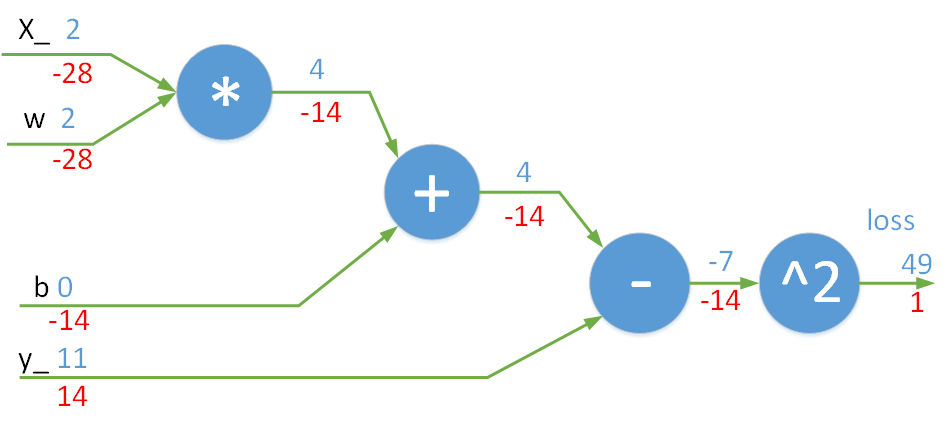

In [83]:
from IPython.display import Image
Image('assets/backward_1.png')

#### 使用 TensorFlow 计算 loss 及梯度

In [84]:
sess.run([loss, grads_and_vars], feed_dict={x: x_, y: y_})

[array([49.], dtype=float32),
 [(array([-28.], dtype=float32), array([2.], dtype=float32)),
  (array([-14.], dtype=float32), array([0.], dtype=float32))]]

### 对于 batch 输入，对比 TensorFlow automatic differentiation 与手工推导

In [85]:
x_ = [2, 3]
y_ = [11, 15]

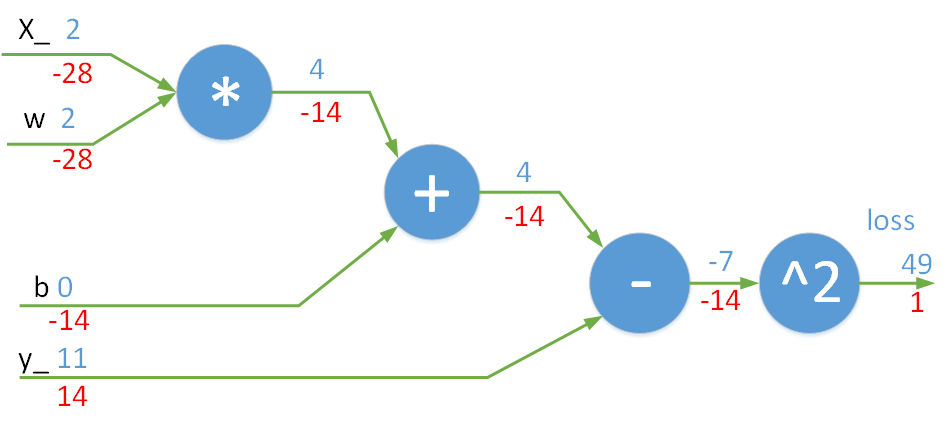

In [86]:
Image("assets/backward_1.png")

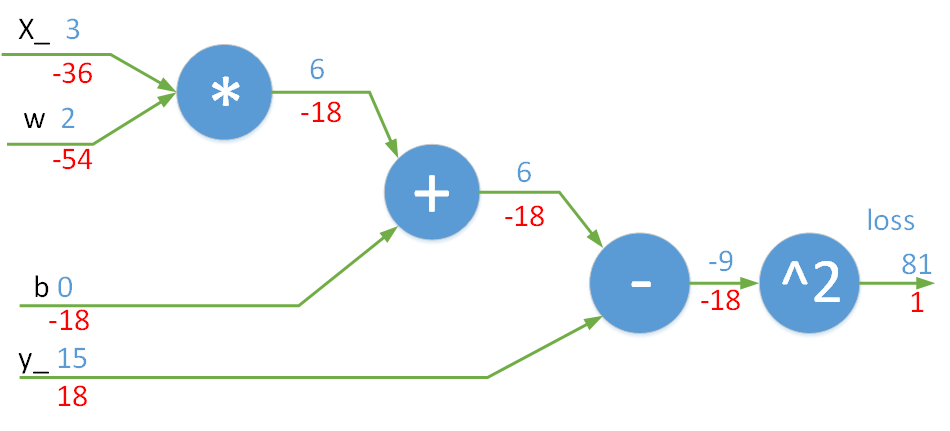

In [87]:
Image("assets/backward_2.png")

In [88]:
sess.run([loss, grads_and_vars], feed_dict={x: x_, y: y_})

[array([49., 81.], dtype=float32),
 [(array([-82.], dtype=float32), array([2.], dtype=float32)),
  (array([-32.], dtype=float32), array([0.], dtype=float32))]]

#### 结果分析

#### 65 == (81+49)/2
#### -41 == (-28-54)/2
#### -16 == (-14-18)/2

#### 可以看出 TensorFlow 计算出的 loss 是两次 loss 的均值，两个变量上的梯度也是各自两次梯度值的均值。

### 以 learning_rate 为步幅对 w，b进行一次更新

#### 手工计算

#### 2 - 0.001 * (-41) = 2.041
#### 0 - 0.001 * (-16) = 0.016

#### TensorFlow 计算结果

In [89]:
sess.run(train_op, feed_dict={x: x_, y: y_})

In [90]:
sess.run([w, b])

[array([2.082], dtype=float32), array([0.032], dtype=float32)]

### 下面对模型进行训练并观察 w，b 的变化过程

In [91]:
for _ in range(1000):
    sess.run(train_op, feed_dict={x: x_, y: y_})
sess.run([w, b])

[array([4.654981], dtype=float32), array([1.305827], dtype=float32)]

In [92]:
for _ in range(1000):
    sess.run(train_op, feed_dict={x: x_, y: y_})
sess.run([w, b])

[array([4.57288], dtype=float32), array([1.5181913], dtype=float32)]

In [93]:
for _ in range(1000):
    sess.run(train_op, feed_dict={x: x_, y: y_})
sess.run([w, b])

[array([4.5010705], dtype=float32), array([1.7039326], dtype=float32)]

In [94]:
for _ in range(10000):
    sess.run(train_op, feed_dict={x: x_, y: y_})
sess.run([w, b])

[array([4.1313486], dtype=float32), array([2.6602662], dtype=float32)]

In [95]:
for _ in range(10000):
    sess.run(train_op, feed_dict={x: x_, y: y_})
sess.run([w, b])

[array([4.034466], dtype=float32), array([2.9108412], dtype=float32)]

#### 可以看出随着训练步骤的增多，w，b 逐渐逼近目标值 4， 3 

In [96]:
sess.close()